In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import pandas as pd

from trading_envs import AdvancedTradingEnv
from logger import TrainingLoggerCallback
from data_and_plots import (
    training_plot,
    plot,
)

In [11]:
sxr8 = pd.read_csv("sxr8_de_d.csv")
dane = sxr8["Zamkniecie"].to_numpy()
dane

array([ 91.21,  91.3 ,  90.52, ..., 562.2 , 562.54, 556.74], shape=(3660,))

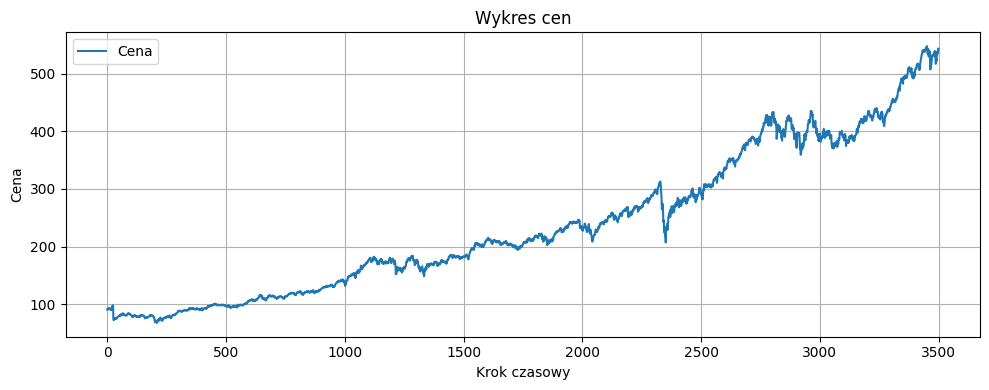

In [50]:
dane_trening = dane[:3500]
plot(dane_trening)

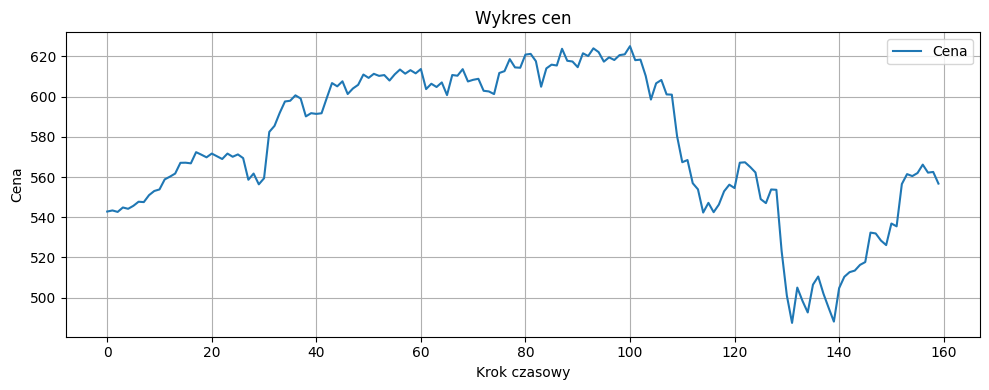

In [51]:
dane_test = dane[3500:]
plot(dane_test)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reshaped_array = dane.reshape(-1, 1)
scaled_data = scaler.fit_transform(reshaped_array)
scaled_data = scaled_data.reshape(-1)
scaled_data

array([0.042228  , 0.04238945, 0.04099022, ..., 0.88712889, 0.88773881,
       0.87733429], shape=(3660,))

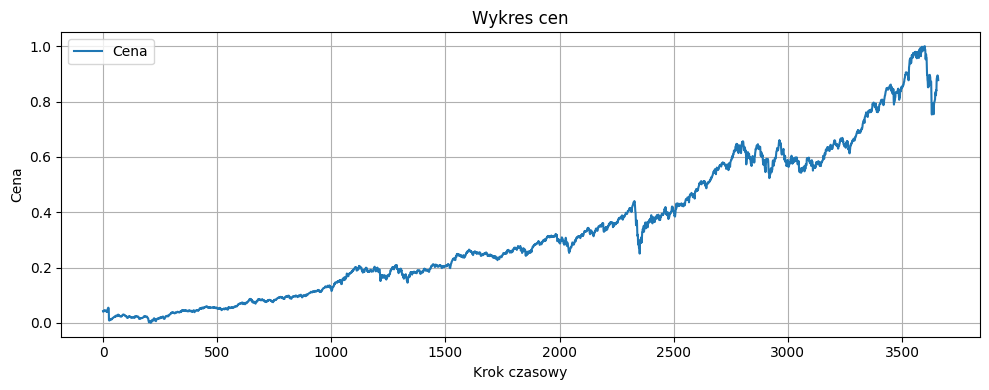

In [20]:
plot(scaled_data)

Using cuda device
Wrapping the env in a DummyVecEnv.


c:\Users\ortek\AppData\Local\pypoetry\Cache\virtualenvs\forecasting-uBk3YmnA-py3.12\Lib\site-packages\stable_baselines3\ppo\ppo.py:155: UserWarning: You have specified a mini-batch size of 1024, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3660`, after every 3 untruncated mini-batches, there will be a truncated mini-batch of size 588
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3660 and n_envs=1)
  warnings.warn(
c:\Users\ortek\AppData\Local\pypoetry\Cache\virtualenvs\forecasting-uBk3YmnA-py3.12\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model w

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 3.5e+03  |
|    ep_rew_mean     | 1.19e+03 |
| time/              |          |
|    fps             | 683      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 3660     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 3.5e+03     |
|    ep_rew_mean          | 784         |
| time/                   |             |
|    fps                  | 690         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 7320        |
| train/                  |             |
|    approx_kl            | 0.003903199 |
|    clip_fraction        | 0.0295      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | -0.00072    |
|    learning_rate        | 0.

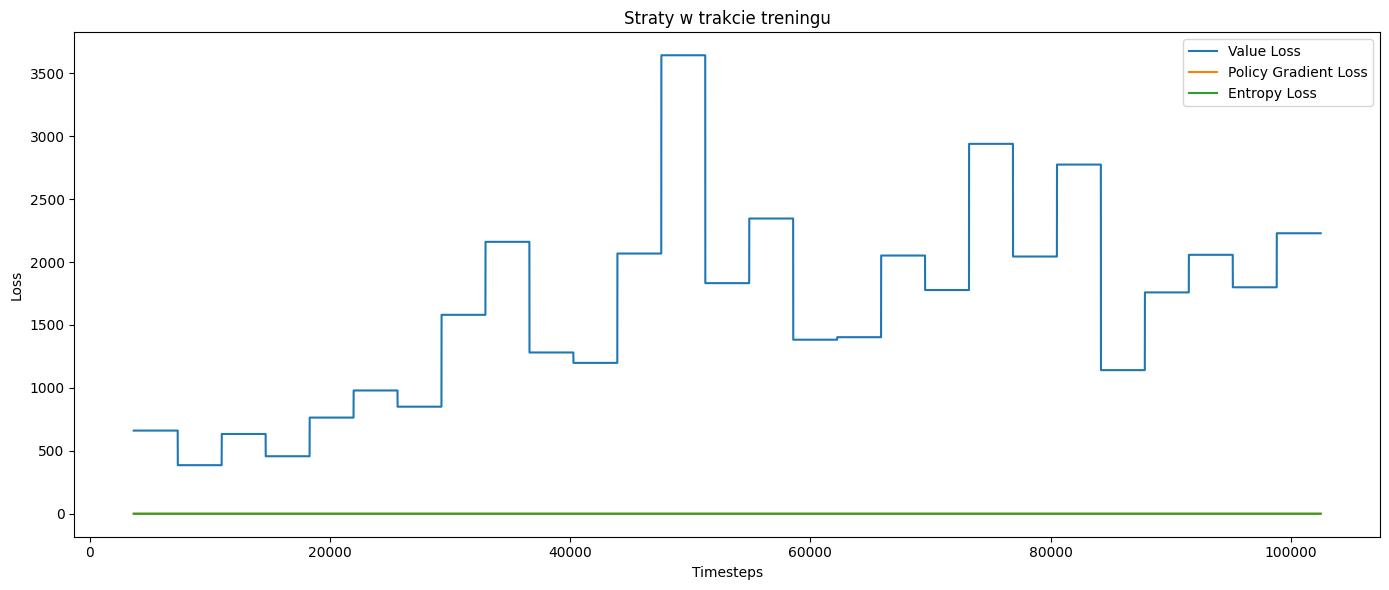

In [52]:
# Stwórz instancję środowiska
env_agent = AdvancedTradingEnv(prices=dane_trening, initial_cash=1000)
env_agent = Monitor(env_agent)

# Sprawdź zgodność środowiska ze Stable-Baselines3
check_env(env_agent)

logger_callback = TrainingLoggerCallback()
# Tworzenie modelu PPO
model_agent = PPO(
    "MlpPolicy",
    env_agent,
    # tensorboard_log="./ppo_trading_tensorboard/",  # <- folder z logami
    policy_kwargs=dict(
        net_arch=[
            256,
            256,
            256,
        ]
    ),
    #   learning_rate=0.001,        # domyślnie 3e-4
    n_steps=3660,  # liczba kroków zanim agent zrobi aktualizację
    batch_size=1024,  # batch size do uczenia
    # n_epochs=10,                 # ile razy przebiega po danych przy każdej aktualizacji
    # gamma=0.5,  # współczynnik dyskontujący nagrody
    # gae_lambda=0.95,             # współczynnik GAE
    # clip_range=0.2,              # zakres klipu PPO (stabilizacja treningu)
    # ent_coef=0.2,                # zachęta do eksploracji
    verbose=1,
)

# Trening modelu
model_agent.learn(total_timesteps=100_000, callback=logger_callback)


training_plot(logger_callback=logger_callback)

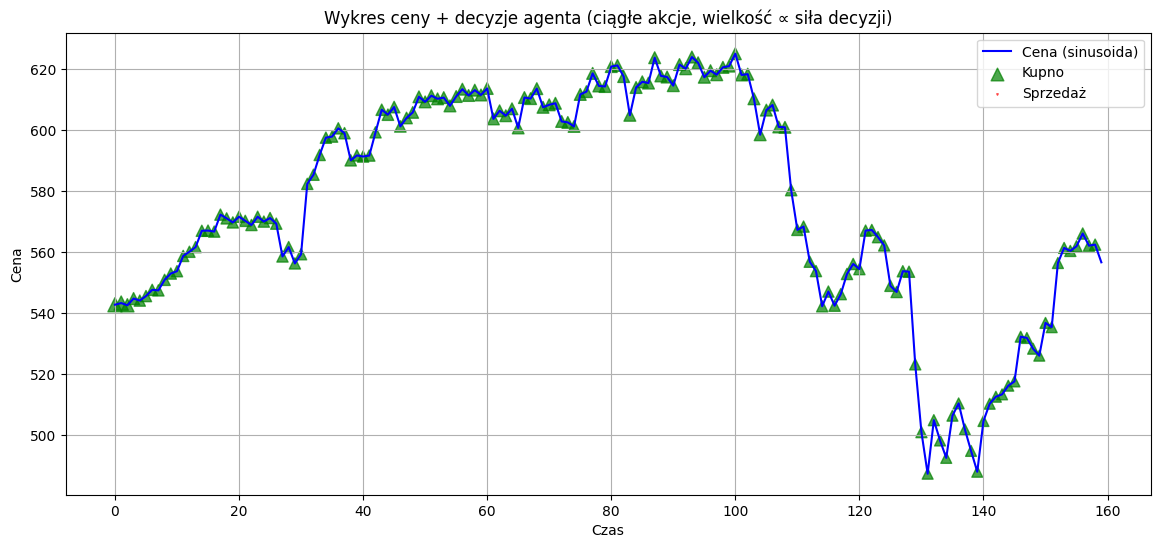

In [ ]:
# results_plot_continuous(env_predict=env_predict, prices=dane_test)

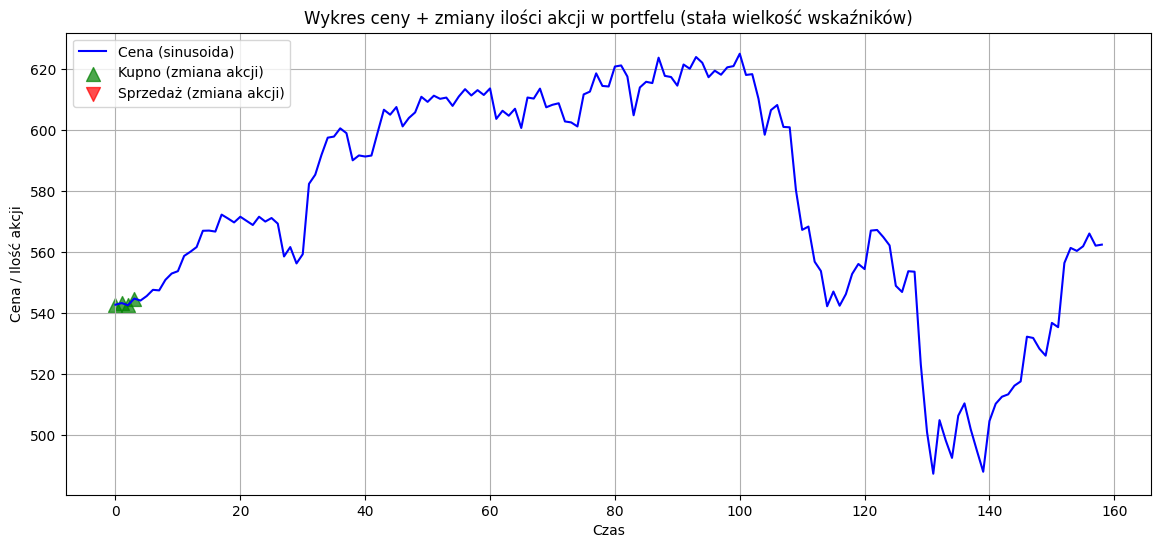

In [ ]:
# plot_shares_changes_fixed_size(lista, dane_test)